# Exploratory of Data Analysis on CCPD2019_base

The dataset can be gained in the [github repo](https://github.com/detectRecog/CCPD).

[The Open-access Paper](https://openaccess.thecvf.com/content_ECCV_2018/papers/Zhenbo_Xu_Towards_End-to-End_License_ECCV_2018_paper.pdf)
by Zhenbo Xu et al. describes the Dataset.

Each pic sized in 720 \* 1180 pixels, 3 channels, has one license plate only.

In [1]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.font_manager as fm

# Set CJK Font to be plotted. Call `fm._rebuild()` after install new font in system.
FONT_FAMILY_CJK = "Noto Sans CJK SC"
plt.rc("font", family=[FONT_FAMILY_CJK])
plt.rc("figure", figsize=(12, 6), dpi=128)

DIR_OF_DATASET = "D:\\Datasets\\CCPD\\CCPD2019"  # The absolute local root dir of CCPD2019
DIR_SUB = "ccpd_base"

os.listdir(DIR_OF_DATASET)

['ccpd_base',
 'ccpd_blur',
 'ccpd_challenge',
 'ccpd_db',
 'ccpd_fn',
 'ccpd_np',
 'ccpd_rotate',
 'ccpd_tilt',
 'ccpd_weather',
 'LICENSE',
 'README.md',
 'splits']

In [2]:
# https://github.com/detectRecog/CCPD#dataset-annotations

provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑",
             "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤",
             "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新",
             "警", "学", "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N',
             'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
             'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P',
       'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',
       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       'O']

In [3]:
columns = ["img_name", "area", "tilt_h", "tilt_v", "bbox_x1", "bbox_y1", "bbox_x2", "bbox_y2",
           "vertex_x1", "vertex_y1", "vertex_x2", "vertex_y2",
           "vertex_x3", "vertex_y3", "vertex_x4", "vertex_y4",
           "LP_province_idx", "LP_city_idx",
           "ads_idx_0", "ads_idx_1", "ads_idx_2", "ads_idx_3", "ads_idx_4",
           "brightness", "bluriness"]

In [4]:
def parse_fname(imgname: str) -> list:
    fields = imgname.rstrip(".jpg")
    fields = fields.replace('_', '-')
    fields = fields.replace('&', '-')
    fields = fields.split('-')
    fields[0] = fields[0].replace('0', '.', 1)
    fields.insert(0, imgname)
    return fields


def get_df_from_path(fpath):
    list_of_parses = [parse_fname(fname) for fname in os.listdir(fpath)]
    df = pd.DataFrame(list_of_parses)
    df.columns = columns
    for col in df.columns:
        if "idx" in col:
            df[col] = df[col].astype(np.int32, copy=False)
        elif "img_name" == col:
            continue
        else:
            df[col] = df[col].astype(np.float32, copy=False)
    return df


df = get_df_from_path(os.path.join(DIR_OF_DATASET, DIR_SUB))

In [5]:
display(df.head(), df.select_dtypes(np.float32).describe())

,img_name,area,tilt_h,tilt_v,bbox_x1,bbox_y1,bbox_x2,bbox_y2,vertex_x1,vertex_y1,...,vertex_y4,LP_province_idx,LP_city_idx,ads_idx_0,ads_idx_1,ads_idx_2,ads_idx_3,ads_idx_4,brightness,bluriness
0,00205459770115-90_85-352&516_448&547-444&547_3...,0.020546,90.0,85.0,352.0,516.0,448.0,547.0,444.0,547.0,...,515.0,0,0,22,10,26,29,24,128.0,7.0
1,00221264367816-91_91-283&519_381&553-375&551_2...,0.022126,91.0,91.0,283.0,519.0,381.0,553.0,375.0,551.0,...,513.0,0,0,7,26,17,33,29,95.0,9.0
2,00223060344828-90_89-441&517_538&546-530&552_4...,0.022306,90.0,89.0,441.0,517.0,538.0,546.0,530.0,552.0,...,516.0,0,0,13,16,33,30,33,148.0,14.0
3,00224137931034-90_87-351&564_451&606-440&599_3...,0.022414,90.0,87.0,351.0,564.0,451.0,606.0,440.0,599.0,...,571.0,0,0,3,21,30,28,24,88.0,5.0
4,00227490421455-90_88-341&443_436&482-437&479_3...,0.022749,90.0,88.0,341.0,443.0,436.0,482.0,437.0,479.0,...,445.0,0,0,9,33,33,29,28,128.0,12.0


,area,tilt_h,tilt_v,bbox_x1,bbox_y1,bbox_x2,bbox_y2,vertex_x1,vertex_y1,vertex_x2,vertex_y2,vertex_x3,vertex_y3,vertex_x4,vertex_y4,brightness,bluriness
count,1.999960e+05,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000,199996.000000
mean,2.592852e+06,91.282829,85.349106,231.279587,468.360901,483.899200,563.351929,486.377930,561.165405,236.534851,553.356323,232.374634,468.545532,482.219513,476.343811,112.964760,49.586281
std,5.810778e+08,4.918104,8.113724,67.108955,63.758785,64.891861,65.957756,64.655838,66.694160,65.723396,65.246559,68.295982,64.253151,66.092735,65.513519,37.134678,42.378292
min,2.054598e-02,56.000000,46.000000,0.000000,26.000000,187.000000,132.000000,193.000000,150.000000,0.000000,122.000000,0.000000,7.000000,183.000000,37.000000,13.000000,2.000000
25%,1.448276e-01,90.000000,82.000000,188.000000,438.000000,443.000000,530.000000,445.000000,528.000000,194.000000,521.000000,188.000000,437.000000,440.000000,444.000000,86.000000,22.000000
50%,2.038434e-01,90.000000,87.000000,229.000000,475.000000,483.000000,569.000000,486.000000,568.000000,234.000000,560.000000,230.000000,474.000000,481.000000,482.000000,113.000000,37.000000
75%,2.861590e-01,92.000000,90.000000,272.000000,506.000000,525.000000,602.000000,528.000000,600.000000,275.000000,593.000000,273.000000,507.000000,524.000000,515.000000,140.000000,63.000000
max,1.492864e+11,129.000000,130.000000,537.000000,762.000000,719.000000,936.000000,720.000000,870.000000,536.000000,949.000000,540.000000,827.000000,719.000000,764.000000,233.000000,1326.000000


## License Plates in picture

In [6]:
loc_centers = pd.DataFrame.from_dict({
    "loc_x": (df["bbox_x2"] + df["bbox_x1"]) / 2,
    "loc_y": (df["bbox_y2"] + df["bbox_y1"]) / 2
})

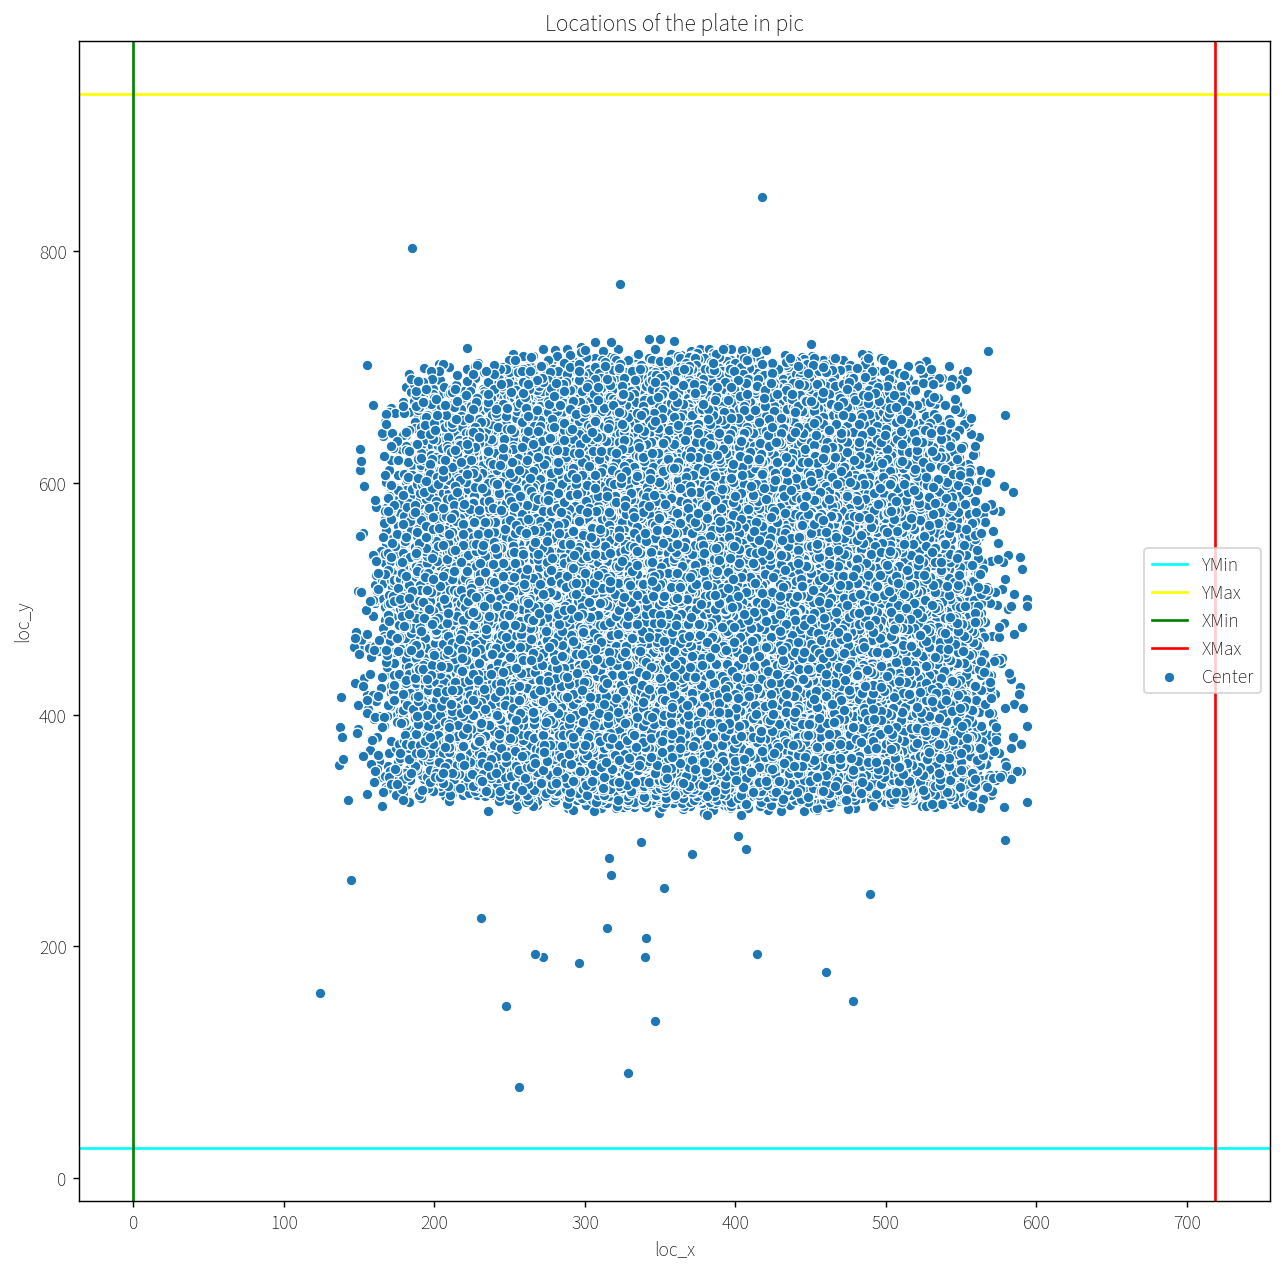

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title("Locations of the plate in pic")
ax.axhline(df["bbox_y1"].min(), c="cyan", label="YMin")
ax.axhline(df["bbox_y2"].max(), c="yellow", label="YMax")
ax.axvline(df["bbox_x1"].min(), c="green", label="XMin")
ax.axvline(df["bbox_x2"].max(), c="red", label="XMax")
sns.scatterplot(x="loc_x", y="loc_y", data=loc_centers, ax=ax, label="Center")
ax.legend()
plt.show()

In [8]:
size_w = df["bbox_x2"] - df["bbox_x1"]
size_h = df["bbox_y2"] - df["bbox_y1"]

aspect_ratio = size_w / size_h
diagonal = np.sqrt(size_w ** 2 + size_h ** 2)

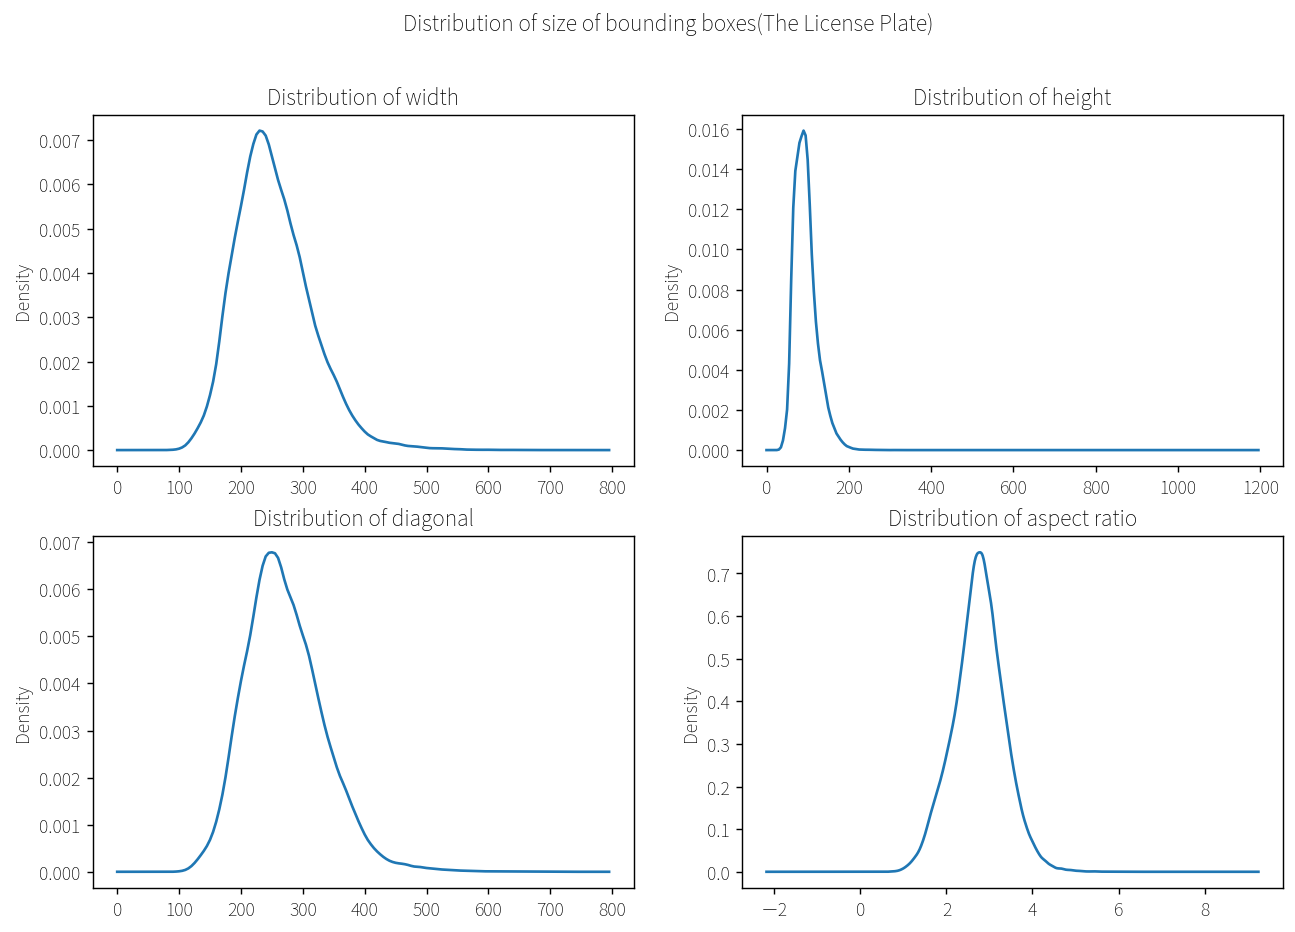

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of size of bounding boxes(The License Plate)")
axes[0, 0].set_title("Distribution of width")
axes[0, 1].set_title("Distribution of height")
axes[1, 0].set_title("Distribution of diagonal")
axes[1, 1].set_title("Distribution of aspect ratio")
size_w.plot.kde(ind=np.arange(0, 800, 5), ax=axes[0, 0])
size_h.plot.kde(ind=np.arange(0, 1200, 5),ax=axes[0, 1])
diagonal.plot.kde(ind=np.arange(0, 800, 5), ax=axes[1, 0])
aspect_ratio.plot.kde(ax=axes[1, 1])
plt.show()

## Counts of license plates by province in dataset

[List of prefixes in license plates](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_China#List_of_prefixes).

In the dataset, over 180,000 license plates issued in Anhui Province, much more than other provinces.

In [10]:
province_count = df["LP_province_idx"].map(lambda idx: provinces[idx]).value_counts()
province_count = province_count.rename("Province counts")

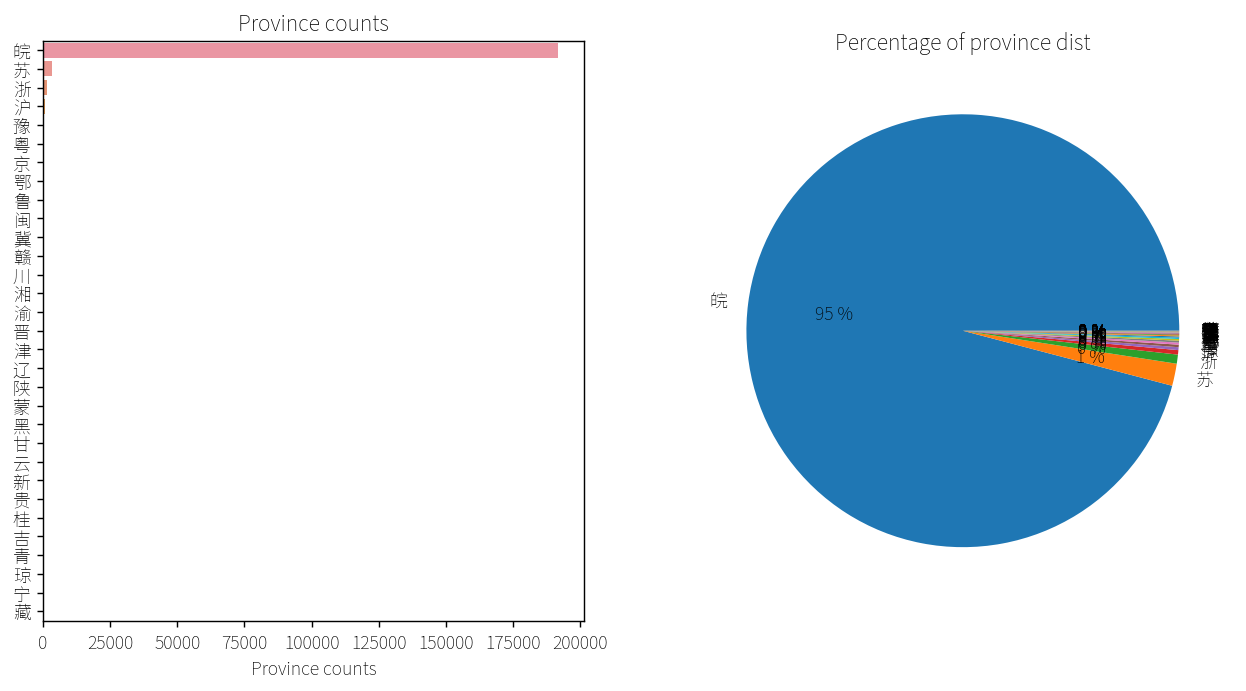

In [11]:
fig, axes = plt.subplots(1, 2)
axes[0].set_title("Province counts")
axes[1].set_title("Percentage of province dist")
sns.barplot(y=province_count.index, x=province_count, ax=axes[0])
axes[1].pie(province_count, labels=province_count.index, autopct="%d %%")
plt.show()

## Counts of license plates by city in dataset

[List of prefixes in license plates](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_China#List_of_prefixes).

In the dataset, over 180,000 license plates issued in Hefei, Anhui Province, much more than other cities.

In [12]:
df_cities = df.loc[:, ["LP_province_idx", "LP_city_idx"]].copy()
df_cities = pd.get_dummies(df_cities, prefix='', prefix_sep='', columns=["LP_city_idx"])
df_cities = df_cities.groupby("LP_province_idx").sum()
df_cities.index = df_cities.index.map(lambda idx: provinces[idx])
df_cities.columns = df_cities.columns.map(lambda idx: alphabets[int(idx)])

# To not to be confused with the city having exactly 1 plate, NaN(means that the city has no license plate at all) is kept.
df_cities_log = np.log2(df_cities)

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  


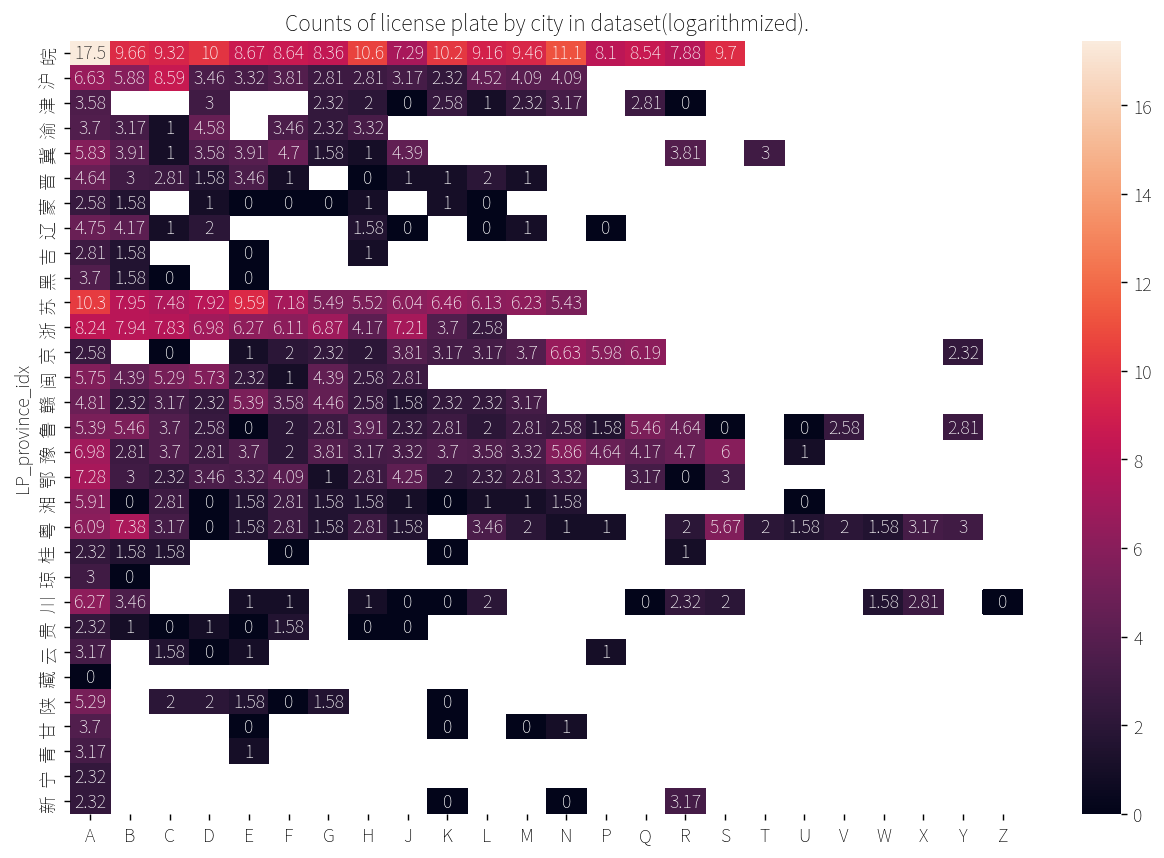

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title("Counts of license plate by city in dataset(logarithmized).")
sns.heatmap(df_cities_log, annot=True, vmin=0, fmt=".3g", ax=ax)
plt.show()